##CM3111 Assessment
#Water well logs interpretation using machine learning


##1.1	Dataset
The dataset comprises geophysical well logs data pertaining to deep water wells located in Saudi Arabia. I was an integral member of the geologists' team responsible for the collection, processing, and interpretation of these data, specifically for underground water projects spanning the period from 2012 to 2019.
The selection of this dataset is motivated by the potential it holds in offering a significant contribution to the field of geophysical water exploration.


##1.2	Related Work & Data Exploration.
#1. Dataset Overview
The dataset is a geophysical well logs records includes parameters such as natural gamma ray emissions, electric resistivity, density, temperature, spontaneous potential, and neutron counts. It is utilized for the purpose of identifying water-bearing zones within the subsurface through the interpretation of these logs. The freshwater zone exhibits distinctive characteristics in the logs, including low gamma ray emissions, a semi-linear and consistent decrease in the separation between short and long resistivity curves, and a relatively high neutron count.


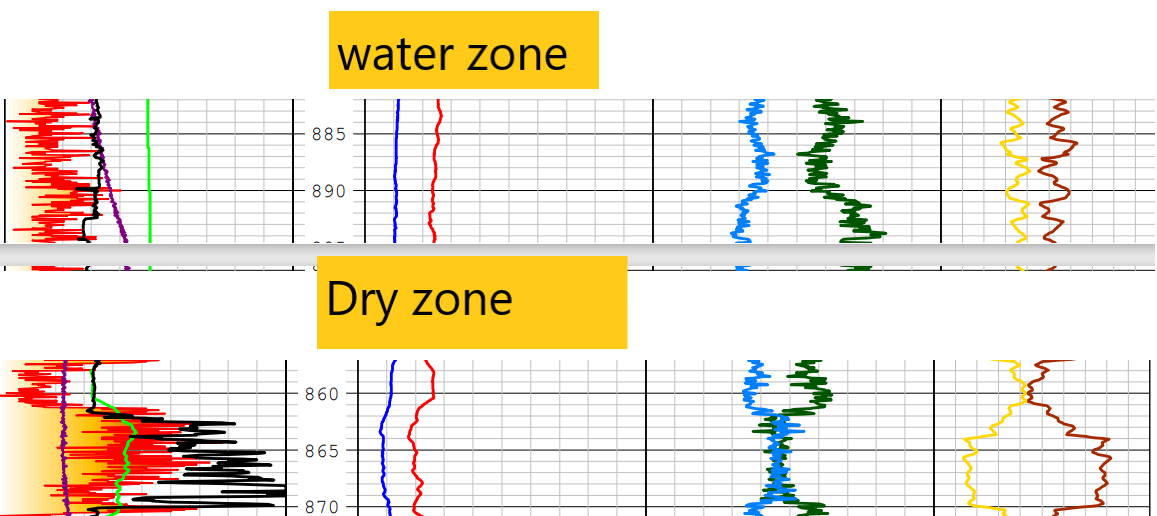

##*2*.Objectives:
The primary objective is to use this dataset  to serve as the foundation for constructing a robust Machine Learning model. This model will possess the capability to discern various log curve behaviors, enabling it to accurately pinpoint water-bearing zones within the provided well logs.


# 3.Peer-reviewed paper:

#4. Data Loading & Exploration:

In [7]:
# import required variables
import pandas as pd
import numpy as np

In [ ]:
# will use 5 dataset form diffrent water well
df01 = pd.read_csv('/content/sample_data/Well_01.csv')
df02 = pd.read_csv('/content/sample_data/Well_02.csv')
df03 = pd.read_csv('/content/sample_data/Well_03.csv')
df04 = pd.read_csv('/content/sample_data/Well_04.csv')
df05 = pd.read_csv('/content/sample_data/Well_05.csv')


In [14]:
# showing the first 10 row
df01.head(10)


,Depth,GAM(NAT),RES(16N),RES(64),NEUTRON,Outcome
0,154.3,42.5951,38.9666,224.772,441.244,Dry
1,154.5,11.3988,38.9666,224.905,437.769,Dry
2,154.8,1.0000,38.9436,225.238,416.923,Dry
3,155.0,11.3988,38.8745,225.338,375.231,Dry
4,155.3,21.7975,38.9436,225.304,295.321,Dry
5,155.5,16.5982,38.9896,225.371,277.949,Dry
6,155.8,1.0000,39.0126,225.437,337.013,Dry
7,156.0,16.5982,39.1047,225.903,354.385,Dry
8,156.3,11.3988,39.0587,226.302,340.487,Dry
9,156.5,11.3988,39.0587,226.369,312.692,Dry


In [11]:
df02.head(10)

,Depth,GAMMA,RES(16N),RES(64N),NEUTRON,Outcome
0,55.0,103.0,139.7,163.780,437.4,Hard_water
1,55.3,114.6,142.3,168.504,435.6,Hard_water
2,55.5,109.9,141.2,168.504,450.6,Hard_water
3,55.8,110.9,141.1,168.504,457.6,Hard_water
4,56.0,106.6,138.9,168.504,424.5,Hard_water
5,56.3,104.2,125.9,184.646,393.1,Hard_water
6,56.5,104.6,65.9,186.614,386.3,Hard_water
7,56.8,101.5,84.5,186.614,410.0,Hard_water
8,57.0,106.9,85.0,186.614,438.0,Hard_water
9,57.3,109.0,84.3,183.858,431.3,Hard_water


In [10]:
 # Showing number of columns and rows for each well data
print(f'The dataset for well01 has {df01.shape[0]} rows and {df01.shape[1]} columns')
print(f'The dataset for well02 has {df02.shape[0]} rows and {df02.shape[1]} columns')
print(f'The dataset for well03 has {df03.shape[0]} rows and {df01.shape[1]} columns')
print(f'The dataset for well04 has {df04.shape[0]} rows and {df02.shape[1]} columns')
print(f'The dataset for well05 has {df05.shape[0]} rows and {df01.shape[1]} columns')

The dataset for well01 has 2002 rows and 6 columns
The dataset for well02 has 3361 rows and 6 columns
The dataset for well03 has 3081 rows and 6 columns
The dataset for well04 has 2002 rows and 6 columns
The dataset for well05 has 2173 rows and 6 columns


In [23]:
 # Checking the names of the columns for each wells
df01.columns

Index(['     Depth', '     GAMMA', '  RES(16N)', '  RES(64N)', '   NEUTRON',
       'Outcome'],
      dtype='object')

In [24]:
df02.columns

Index(['     Depth', '     GAMMA', '  RES(16N)', '  RES(64N)', '   NEUTRON',
       'Outcome'],
      dtype='object')

In [25]:
df03.columns

Index(['     Depth', '     GAMMA', '  RES(16N)', '  RES(64N)', '   NEUTRON',
       'Outcome'],
      dtype='object')

In [26]:
df04.columns

Index(['     Depth', '     GAMMA', '  RES(16N)', '  RES(64N)', '   NEUTRON',
       'Outcome'],
      dtype='object')

In [27]:
df05.columns

Index(['     Depth', '  GAM(NAT)', '   RES(16)', '   RES(64)', '   NEUTRON',
       'Outcome'],
      dtype='object')

In [28]:
# Checking the data types
df01.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0        Depth  2002 non-null   float64
 1     GAM(NAT)  2002 non-null   float64
 2     RES(16N)  2002 non-null   float64
 3      RES(64)  2002 non-null   float64
 4      NEUTRON  2002 non-null   float64
 5   Outcome     2002 non-null   object 
dtypes: float64(5), object(1)
memory usage: 94.0+ KB


In [30]:
#  Obtaining nformation about other feature
# for every column
for i in df01.columns:
    # print how many features it has
    print(i, len(df01[i].unique()))



     Depth 2002
  GAM(NAT) 29
  RES(16N) 746
   RES(64) 632
   NEUTRON 251
Outcome 3


In [31]:
#  Obtaining nformation about other feature
# for every column
for i in df02.columns:
    # print how many features it has
    print(i, len(df02[i].unique()))

     Depth 3361
     GAMMA 1237
  RES(16N) 769
  RES(64N) 951
   NEUTRON 2683
Outcome 3


In [32]:
 #  Statistical information about the data set
 df01.describe()

,Depth,GAM(NAT),RES(16N),RES(64),NEUTRON
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,404.400000,22.806421,23.888146,45.715008,669.941578
std,144.517965,25.532943,25.595187,61.197199,181.716064
min,154.300000,0.000000,0.000000,0.000000,0.000000
25%,279.350000,1.000000,12.769700,19.037000,555.897000
50%,404.400000,11.398800,14.887600,21.764200,653.180000
75%,529.450000,32.196300,18.985100,28.748400,757.410000
max,654.500000,167.380000,145.734000,309.449000,1368.900000


In [ ]:
# For exploring the dataset easier
# I built a streamlit app to load and explore the data on a browser
# a long with informations
# As following:

In [15]:
# Install streamlit web app framwork
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [20]:
# generate a Endpoint IP use to accsess the localtunnal website
!wget -q -O - ipv4.icanhazip.com

34.32.220.5


In [ ]:
## well_logs_app.py
import streamlit as st
import pandas as pd
import os

# Load dataset function
@st.cache_data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Main function
def main():
    st.title("Well Logs Dataset Exploration")

    # I will be using multiple datasets files
    # Get a list of CSV files in the current directory
    files = [file for file in os.listdir() if file.endswith(".csv")]

    # To choose a dataset file
    uploaded_file = st.selectbox("Choose a dataset file", files)

    if uploaded_file is not None:
        # Read the dataset
        df = load_data(uploaded_file)

         # Display the Dataset Information
        st.subheader("Dataset Information")
        st.write(f"Dataset ID: {uploaded_file}")
        st.write(f"Number of rows: {df.shape[0]}")
        st.write(f"Number of columns: {df.shape[1]}")

        # Display the dataset
        st.subheader("Dataset")
        st.write(df)



if __name__ == '__main__':
    main()


In [21]:
# Upload the well logs app buil in python to the same directry where the dataset
# To run my well logs app in a browser
! streamlit run well_logs_app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.32.220.5:8501

npx: installed 22 in 2.306s
your url is: https://moody-swans-cheer.loca.lt
  Stopping...
^C


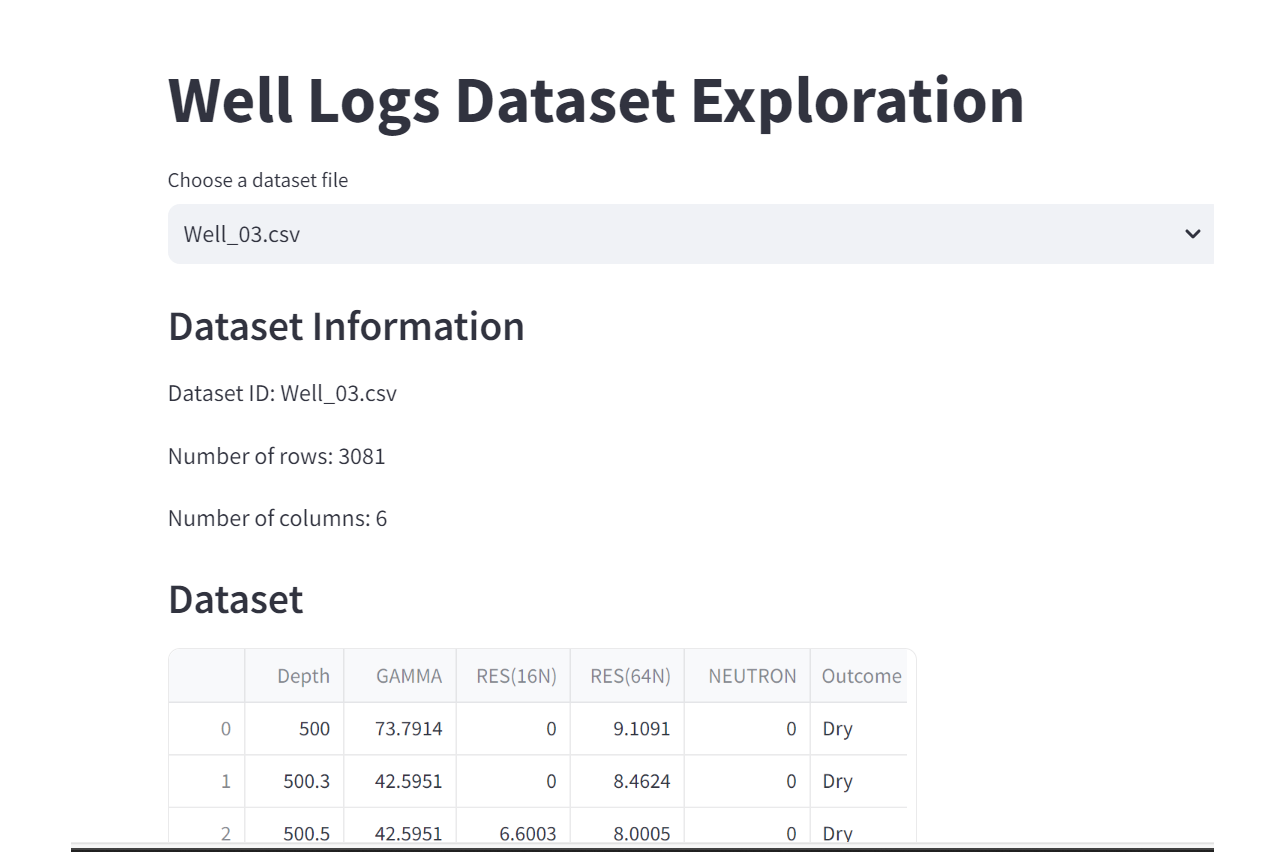

#1.3 Data Pre-processing

#2 Modelling/ Classification